In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/processed_data.csv')
df.head(3)

category  headline_length  short_description_length  \
0           NEWS               76                       154   
1           NEWS               89                       159   
2  ENTERTAINMENT               69                        64   

                                             content  \
0  Over 4 Million Americans Roll Up Sleeves For O...   
1  American Airlines Flyer Charged, Banned For Li...   
2  23 Of The Funniest Tweets About Cats And Dogs ...   

                                   content_processed  
0  over million americans roll sleeves omicron ta...  
1  american airlines flyer charged banned life af...  
2  funniest tweets cats dogs week sept dog not un...

In [2]:
df['content_len'] = df['content'].apply(lambda x : len(x))
df['processed_len'] = df['content_processed'].apply(lambda x : len(x))
df.head(3)

category  headline_length  short_description_length  \
0           NEWS               76                       154   
1           NEWS               89                       159   
2  ENTERTAINMENT               69                        64   

                                             content  \
0  Over 4 Million Americans Roll Up Sleeves For O...   
1  American Airlines Flyer Charged, Banned For Li...   
2  23 Of The Funniest Tweets About Cats And Dogs ...   

                                   content_processed  content_len  \
0  over million americans roll sleeves omicron ta...          230   
1  american airlines flyer charged banned life af...          248   
2  funniest tweets cats dogs week sept dog not un...          133   

   processed_len  
0            167  
1            189  
2             71

<Axes: xlabel='content_len', ylabel='Count'>

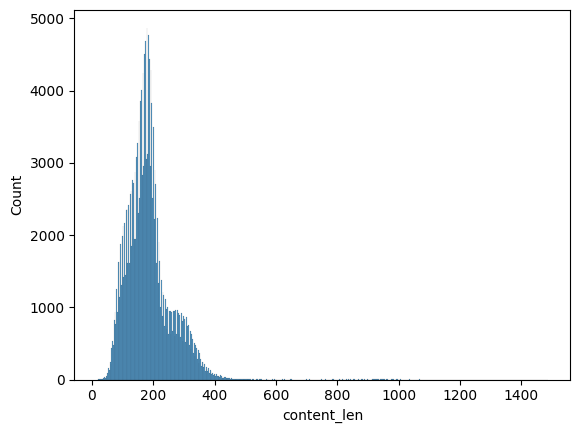

In [3]:
sns.histplot(df, x='content_len')

processed_len
count  189814.000000
mean      135.840818
std        50.799623
min        10.000000
25%       103.000000
50%       131.000000
75%       161.000000
max      1066.000000

<Axes: xlabel='processed_len', ylabel='Count'>

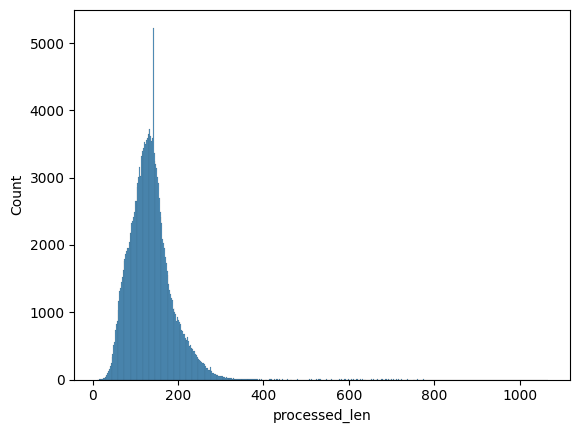

In [4]:
display(df[['processed_len']].describe())
sns.histplot(df, x='processed_len')

- 75% of the documents have atmost 155 length after preprocessing.
- Checking the number of columns having processed_content_length more than 350

In [5]:
df[df['processed_len'] >= 350]['category'].value_counts()

category
POLITICS          135
NEWS               73
WELLNESS           25
LIFE               21
BUSINESS           15
IMPACT             12
ENVIRONMENT        10
STYLE & BEAUTY      9
VOICES              6
FAMILY              5
EDUCATION           3
ENTERTAINMENT       3
HOME & LIVING       3
ARTS & CULTURE      2
SCIENCE             2
FOOD & DRINK        2
Name: count, dtype: int64

processed_len
count  189488.000000
mean      135.135745
std        47.454557
min        10.000000
25%       103.000000
50%       131.000000
75%       160.000000
max       349.000000

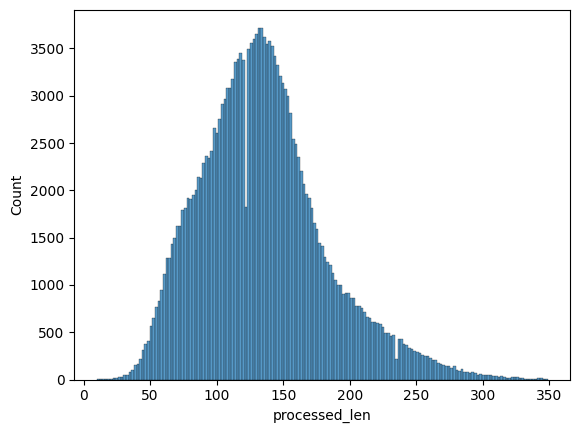

In [6]:
#filtering these out

df = df[df['processed_len'] < 350]
display(df[['processed_len']].describe())
sns.histplot(df, x='processed_len')
plt.savefig('figs/final_processed_content_length.png')

For NEWS:


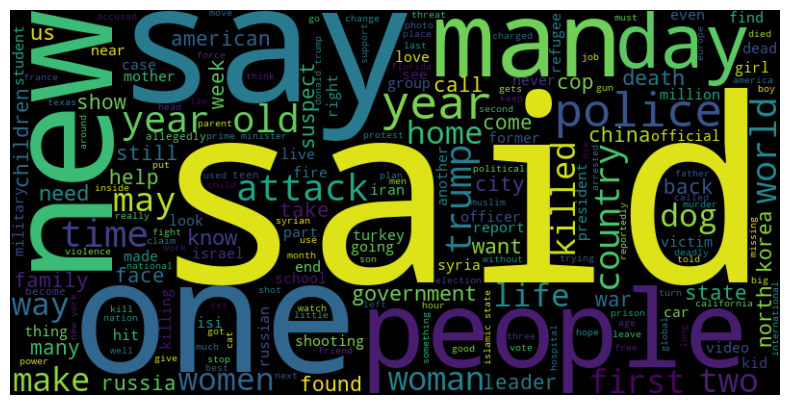

******************************************************************************
For ENTERTAINMENT:


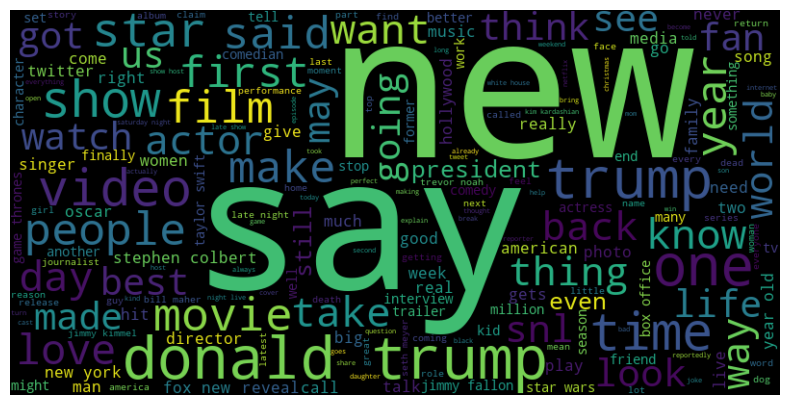

******************************************************************************
For FAMILY:


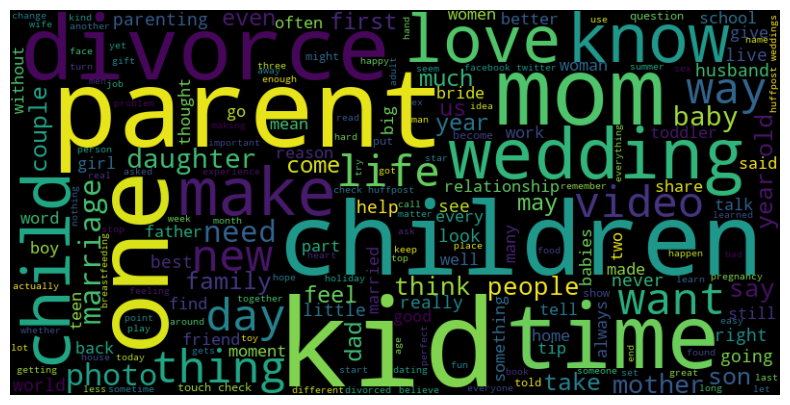

******************************************************************************
For ARTS & CULTURE:


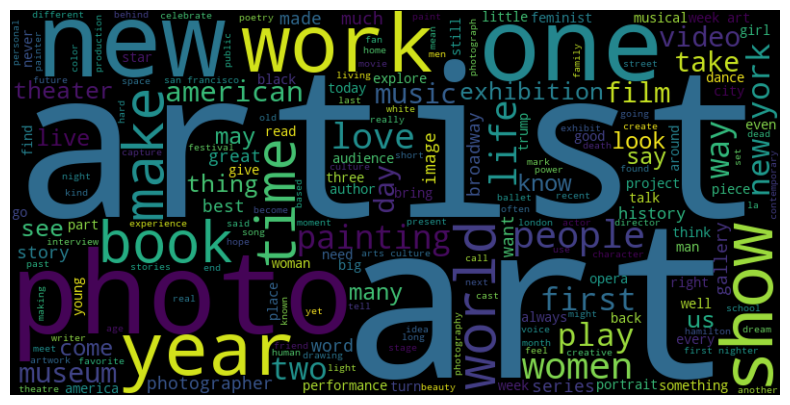

******************************************************************************
For SCIENCE:


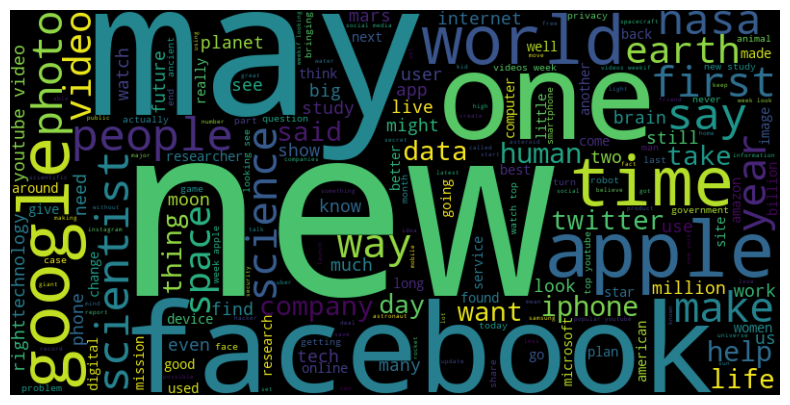

******************************************************************************
For SPORTS:


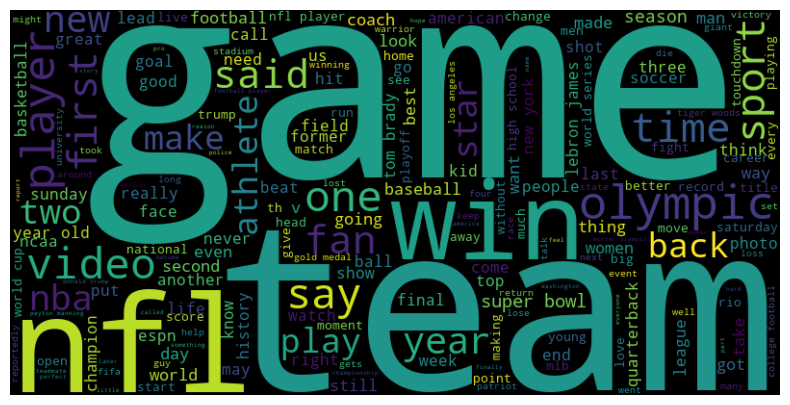

******************************************************************************
For POLITICS:


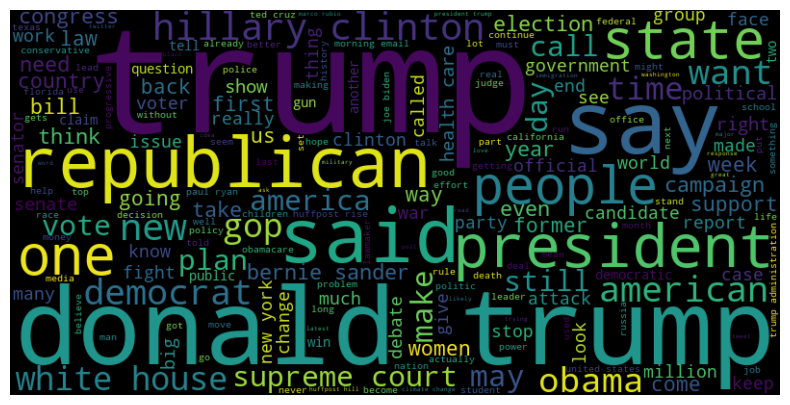

******************************************************************************
For ENVIRONMENT:


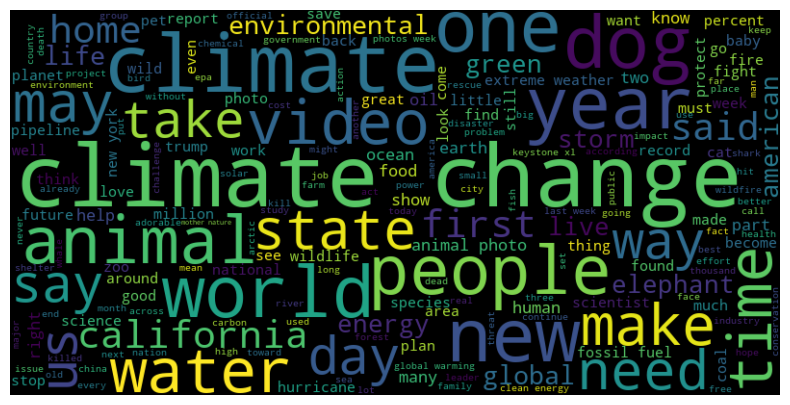

******************************************************************************
For EDUCATION:


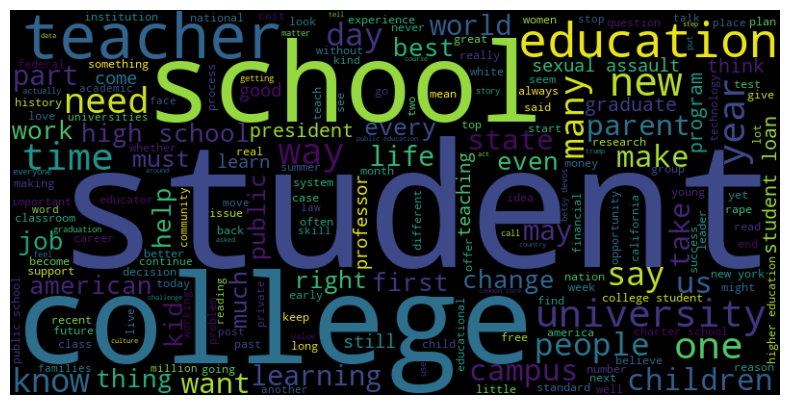

******************************************************************************
For WELLNESS:


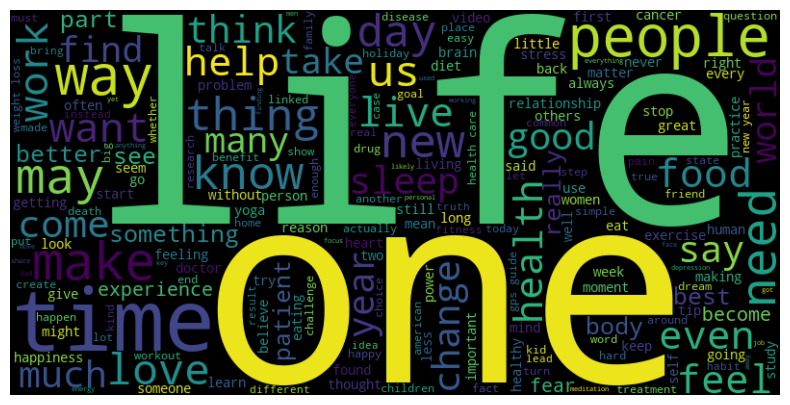

******************************************************************************
For BUSINESS:


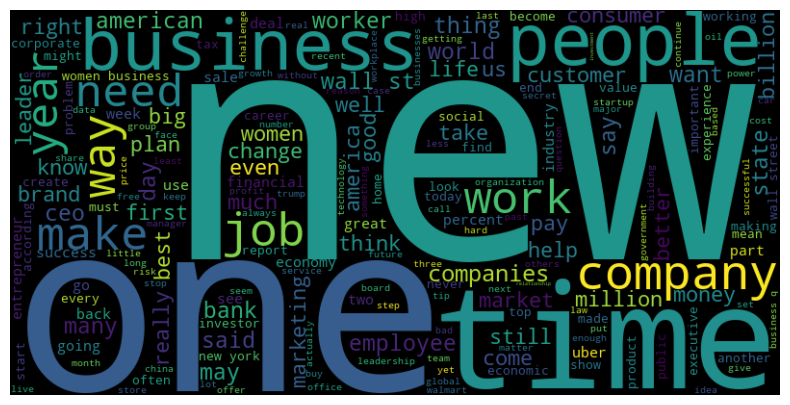

******************************************************************************
For STYLE & BEAUTY:


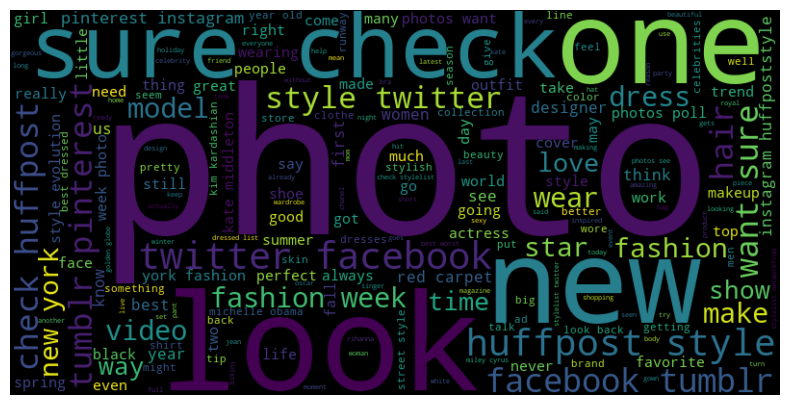

******************************************************************************
For FOOD & DRINK:


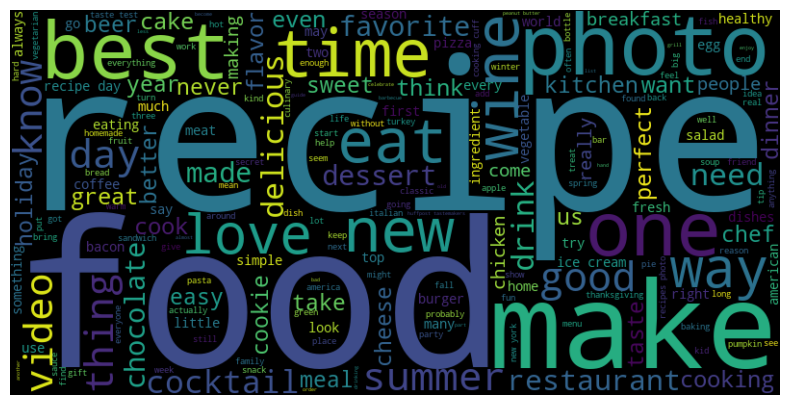

******************************************************************************
For VOICES:


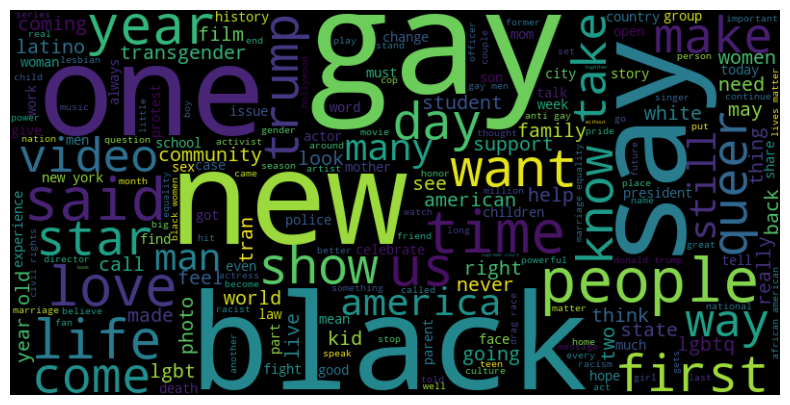

******************************************************************************
For HOME & LIVING:


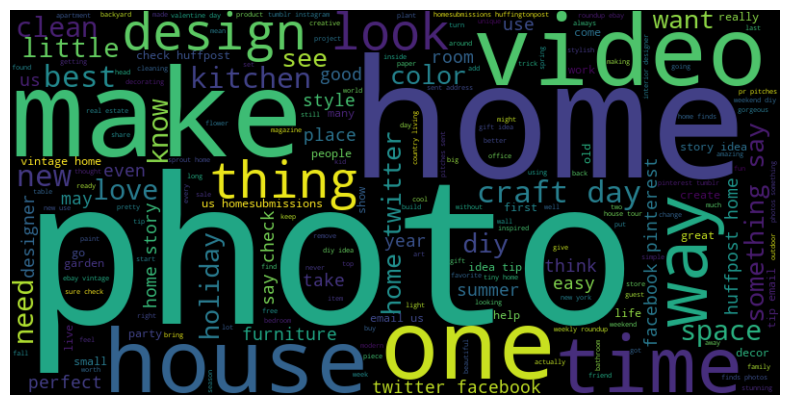

******************************************************************************
For LIFE:


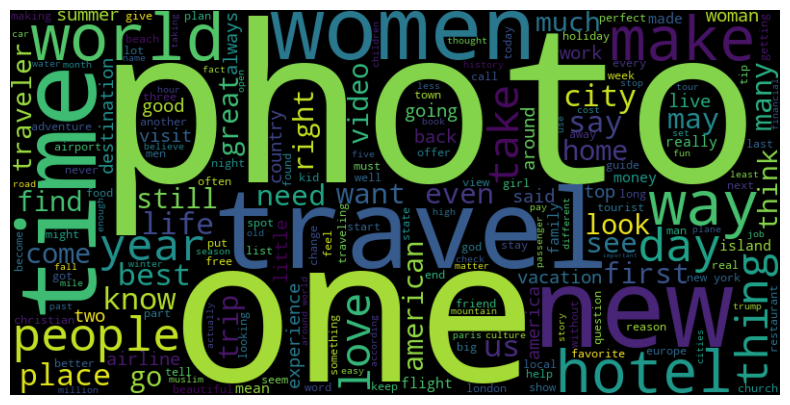

******************************************************************************
For IMPACT:


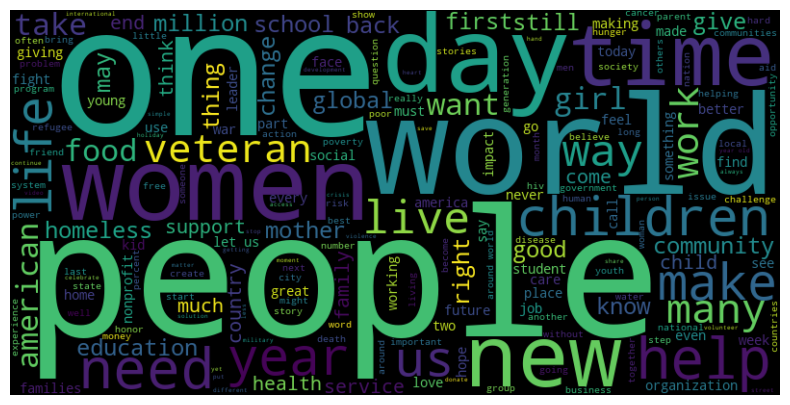

******************************************************************************


In [7]:
from wordcloud import WordCloud

for c in df['category'].unique():

    # Concatenate all text data into a single string
    text_data = ' '.join(df[df['category'] == c]['content_processed'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_data)
    print(f'For {c}:')
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(f'figs/{c}_wordcloud.png')
    plt.show()
    print('******************************************************************************')

In [8]:
df.to_csv('data/final_data.csv', index = False)